# The aim is to determine the type of Eryhemato-Squamous Disease.

The differential diagnosis of "erythemato-squamous" diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with minimal differences. The disorders in this group are psoriasis, seborrheic dermatitis, lichen planus, pityriasis rosea, chronic dermatitis, and pityriasis rubra pilaris. Usually, a biopsy is necessary for the diagnosis, but unfortunately, these diseases share many histopathological features as well.

Patients were first evaluated clinically with 12 features. Afterward, skin samples were taken for the evaluation of 22 histopathological features. The values of the histopathological features are determined by an analysis of the samples under a microscope

# Feature Value Information


In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient.

Every other feature clinical and histopathological was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("dermatology_database_1.csv")

In [3]:
df.head() 

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [4]:
df.shape

(366, 35)

In [5]:
df['class'].value_counts()


1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

# Data Cleaning 

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [7]:
df.isnull().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [8]:
age_values_with_qmarks = df[df["age"]=="?"]

In [9]:
age_values_with_qmarks

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
33,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,?,1
34,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,4
35,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,2
36,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,?,3
262,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5
263,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,?,5
264,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,?,5
265,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5


In [10]:
df["age"] = df["age"].replace("?", np.nan)

In [11]:
df["age"].unique() 

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', nan, '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [12]:
df['age'] = df['age'].replace('?', np.nan)  # Replace '?' with NaN

In [13]:
df.dropna(subset=['age'], inplace=True)


In [14]:
age_values_with_qmarks = df[df["age"]=="?"]
age_values_with_qmarks


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class


In [15]:
df["class"].value_counts()

1    111
3     71
2     60
5     48
4     48
6     20
Name: class, dtype: int64

In [16]:
df.dtypes


erythema                                int64
scaling                                 int64
definite_borders                        int64
itching                                 int64
koebner_phenomenon                      int64
polygonal_papules                       int64
follicular_papules                      int64
oral_mucosal_involvement                int64
knee_and_elbow_involvement              int64
scalp_involvement                       int64
family_history                          int64
melanin_incontinence                    int64
eosinophils_infiltrate                  int64
PNL_infiltrate                          int64
fibrosis_papillary_dermis               int64
exocytosis                              int64
acanthosis                              int64
hyperkeratosis                          int64
parakeratosis                           int64
clubbing_rete_ridges                    int64
elongation_rete_ridges                  int64
thinning_suprapapillary_epidermis 

In [17]:
df['age'] = df['age'].astype(float).astype(pd.Int64Dtype())  # Convert to float and then to integer


In [18]:
df.dtypes

erythema                               int64
scaling                                int64
definite_borders                       int64
itching                                int64
koebner_phenomenon                     int64
polygonal_papules                      int64
follicular_papules                     int64
oral_mucosal_involvement               int64
knee_and_elbow_involvement             int64
scalp_involvement                      int64
family_history                         int64
melanin_incontinence                   int64
eosinophils_infiltrate                 int64
PNL_infiltrate                         int64
fibrosis_papillary_dermis              int64
exocytosis                             int64
acanthosis                             int64
hyperkeratosis                         int64
parakeratosis                          int64
clubbing_rete_ridges                   int64
elongation_rete_ridges                 int64
thinning_suprapapillary_epidermis      int64
spongiform

# Data Visualization


In [19]:
import matplotlib.pyplot as plt

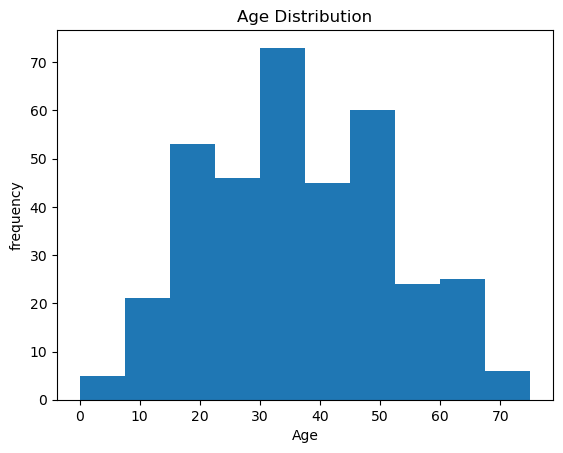

In [20]:
plt.hist(df["age"], bins=10)
plt.xlabel("Age")
plt.ylabel("frequency")
plt.title("Age Distribution")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

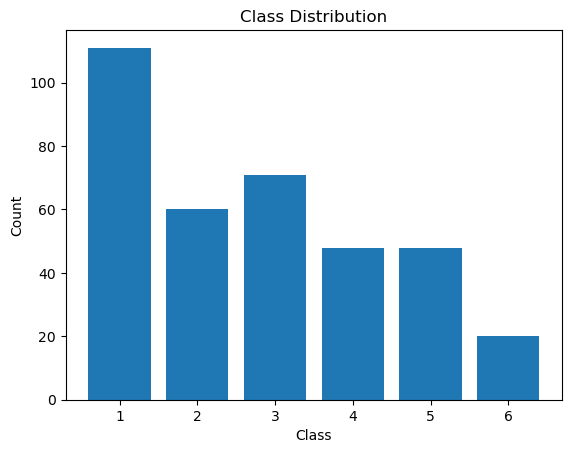

In [21]:
class_counts=df["class"].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show

In [22]:
import seaborn as sns
corr_matrix = df.corr()
corr_matrix

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
erythema,1.000000,0.428769,0.248062,-0.033157,-0.008496,0.028225,-0.115275,-0.033391,0.138519,0.180740,...,0.153229,-0.003972,0.038837,-0.012408,-0.008997,0.006100,0.093026,-0.013850,-0.005028,-0.324846
scaling,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.075013,-0.098665,-0.084815,0.294258,0.295932,...,0.205046,-0.113133,0.023095,-0.118109,-0.014702,-0.015402,-0.008453,-0.134966,0.016006,-0.458499
definite_borders,0.248062,0.347106,1.000000,-0.058534,0.239778,0.322657,-0.176715,0.280341,0.301187,0.261495,...,0.350007,0.291443,-0.252643,0.267409,-0.093264,-0.131788,0.124812,0.275099,0.138493,-0.381456
itching,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.412525,-0.144027,0.361761,-0.296824,-0.152562,...,-0.190548,0.371404,0.003028,0.380075,-0.176096,-0.184385,0.051553,0.389887,0.048053,0.039744
koebner_phenomenon,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.388233,-0.175676,0.387937,-0.065438,0.013496,...,0.002588,0.372236,0.006726,0.377539,-0.150348,-0.166956,0.110295,0.377323,0.081162,-0.089586
polygonal_papules,0.028225,-0.075013,0.322657,0.412525,0.388233,1.000000,-0.139384,0.863269,-0.278843,-0.258231,...,-0.122467,0.911598,0.091031,0.894775,-0.097084,-0.112007,0.258753,0.904112,0.096953,0.064451
follicular_papules,-0.115275,-0.098665,-0.176715,-0.144027,-0.175676,-0.139384,1.000000,-0.134484,0.220849,-0.007320,...,-0.161487,-0.142335,-0.012624,-0.141489,0.784991,0.844721,-0.093833,-0.136311,-0.371368,0.488708
oral_mucosal_involvement,-0.033391,-0.084815,0.280341,0.361761,0.387937,0.863269,-0.134484,1.000000,-0.286160,-0.264638,...,-0.109676,0.886238,0.129879,0.873730,-0.084040,-0.108070,0.276068,0.890685,0.111047,0.062185
knee_and_elbow_involvement,0.138519,0.294258,0.301187,-0.296824,-0.065438,-0.278843,0.220849,-0.286160,1.000000,0.659286,...,0.480594,-0.285184,-0.417851,-0.283383,0.231977,0.256811,-0.079246,-0.279753,-0.078267,-0.382276
scalp_involvement,0.180740,0.295932,0.261495,-0.152562,0.013496,-0.258231,-0.007320,-0.264638,0.659286,1.000000,...,0.485260,-0.257697,-0.425421,-0.262429,-0.055091,-0.020456,0.027887,-0.255333,0.036412,-0.534716


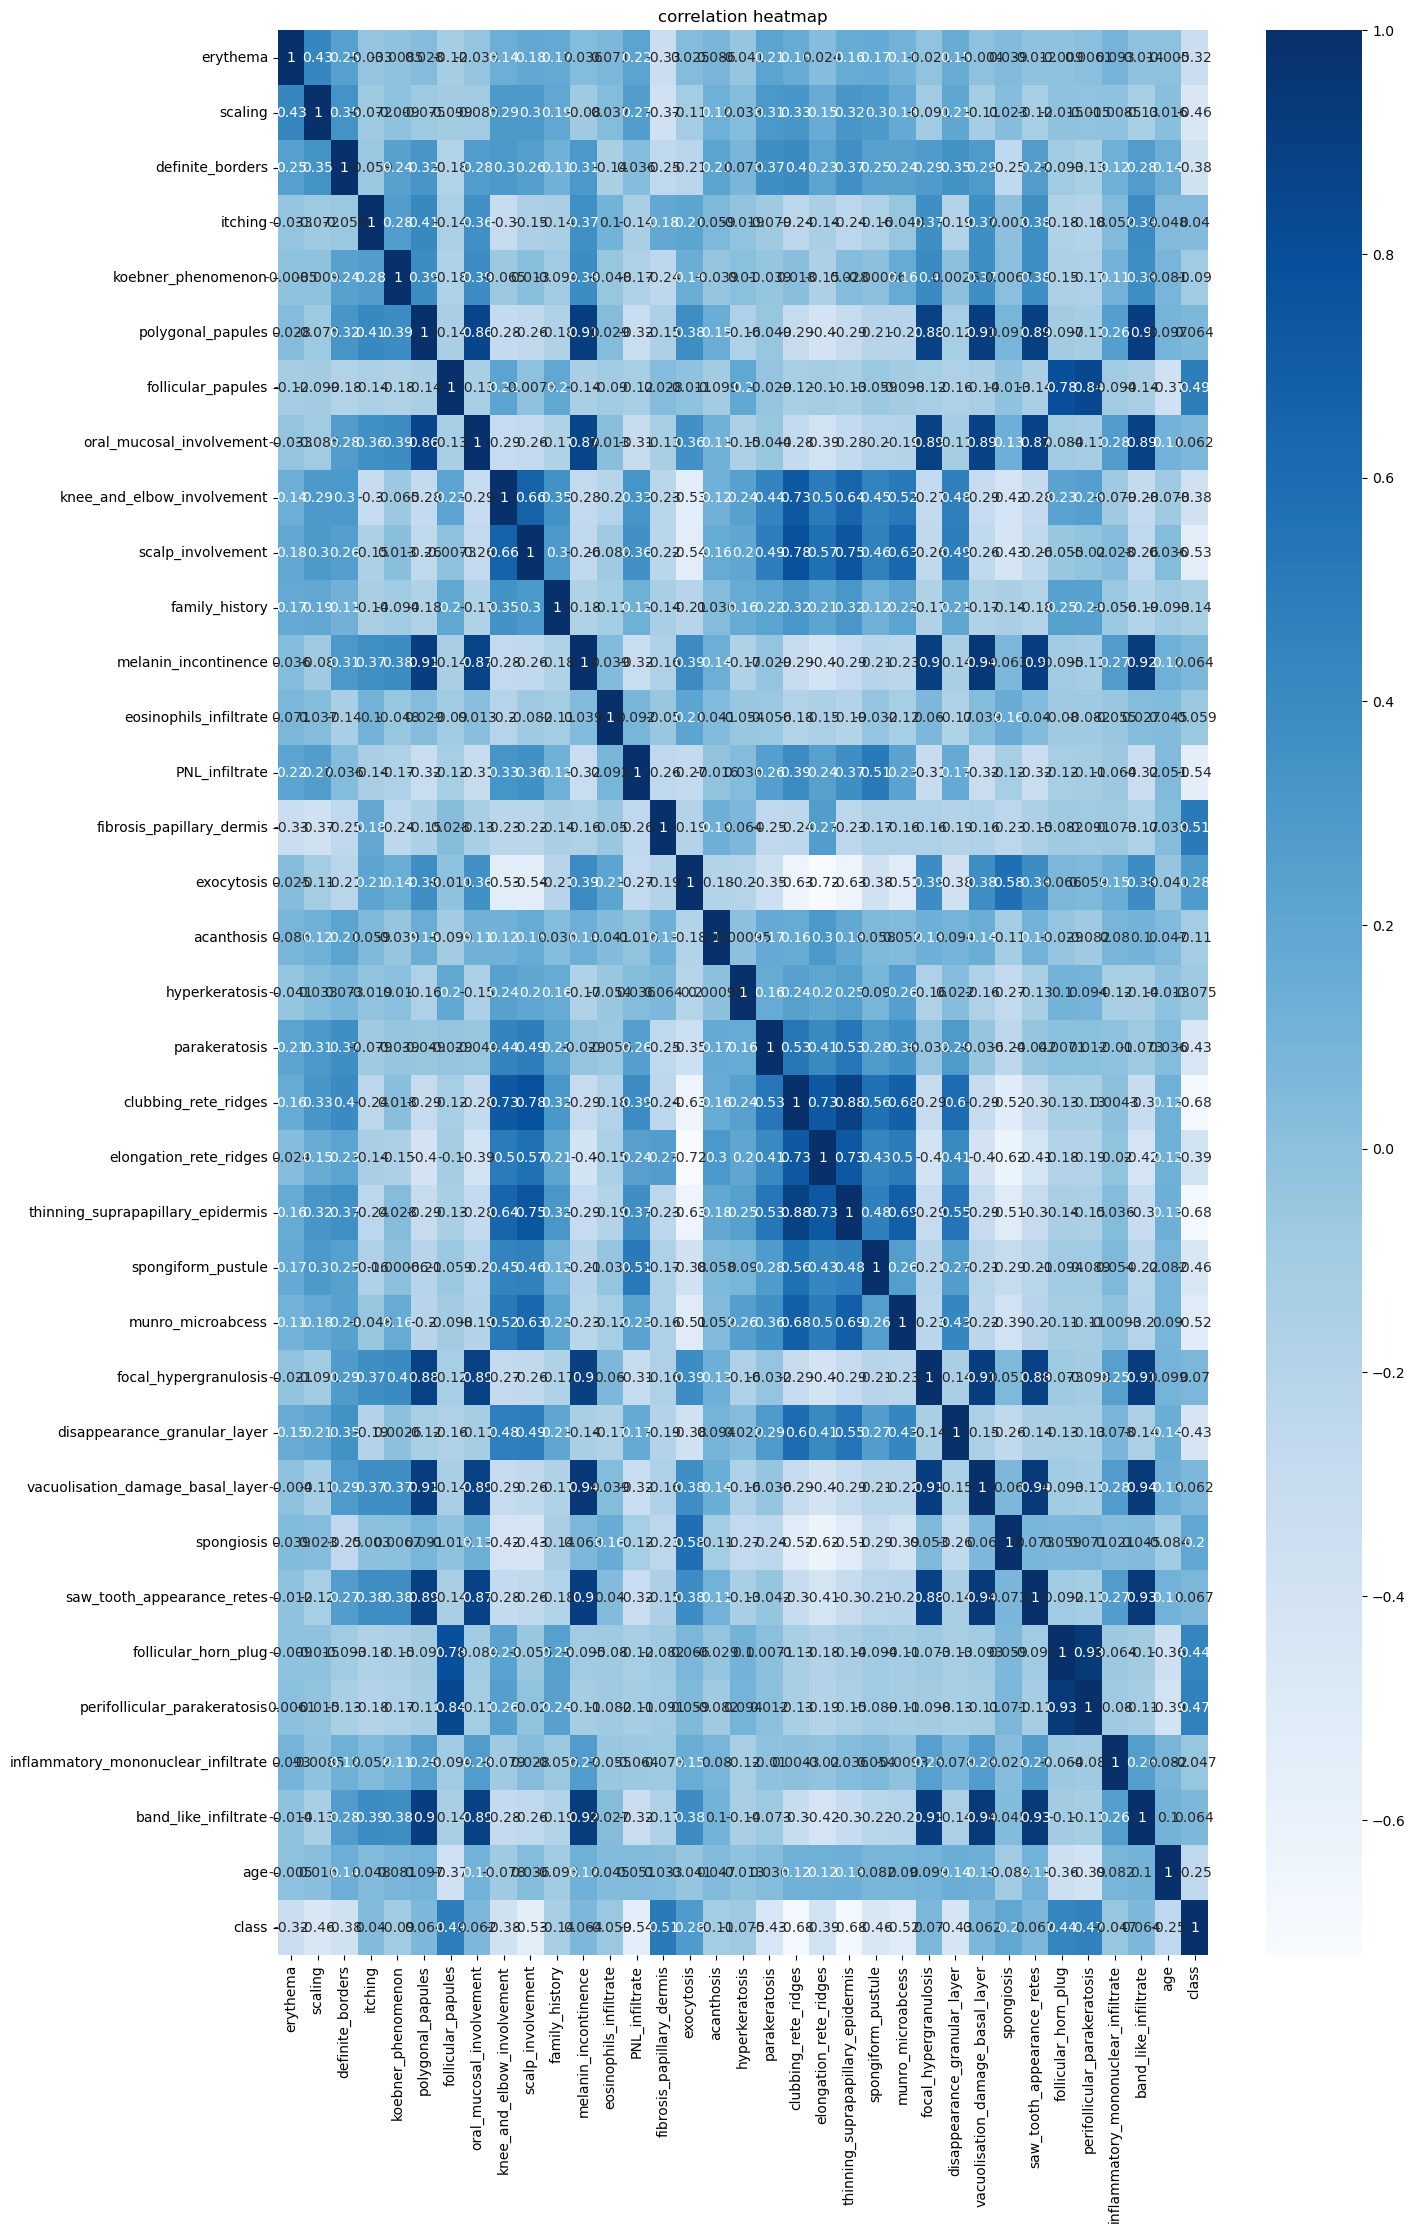

In [23]:
plt.figure(figsize=(15,25))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("correlation heatmap")
plt.show()

In [24]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [69]:
x

array([[2, 2, 0, ..., 1, 0, 55],
       [3, 3, 3, ..., 1, 0, 8],
       [2, 1, 2, ..., 2, 3, 26],
       ...,
       [3, 2, 2, ..., 2, 3, 28],
       [2, 1, 3, ..., 2, 3, 50],
       [3, 2, 2, ..., 3, 0, 35]], dtype=object)

In [70]:
y

array([1, 0, 2, 0, 2, 1, 4, 2, 3, 3, 0, 1, 1, 0, 2, 3, 1, 0, 2, 4, 5, 1,
       4, 2, 4, 0, 5, 4, 1, 2, 0, 1, 0, 1, 2, 0, 1, 3, 0, 1, 4, 2, 3, 5,
       1, 2, 2, 3, 0, 0, 4, 0, 1, 2, 3, 1, 5, 0, 4, 0, 1, 2, 0, 3, 4, 0,
       1, 5, 2, 4, 3, 1, 1, 0, 2, 4, 0, 1, 1, 1, 4, 0, 0, 2, 0, 3, 1, 1,
       4, 0, 2, 3, 1, 4, 0, 5, 1, 4, 0, 1, 1, 0, 3, 0, 2, 0, 0, 2, 4, 2,
       2, 4, 1, 2, 3, 0, 1, 4, 5, 0, 0, 1, 5, 2, 4, 3, 0, 0, 2, 4, 4, 0,
       3, 1, 2, 0, 1, 0, 0, 2, 2, 2, 1, 4, 3, 1, 1, 0, 0, 0, 4, 2, 1, 2,
       1, 1, 3, 1, 2, 5, 1, 0, 0, 2, 3, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2,
       0, 0, 0, 0, 5, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 1, 1, 4, 4,
       4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 5, 5, 5, 3, 3, 3,
       0, 0, 0, 0, 0, 1, 1, 3, 3, 3, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 4, 4, 4, 4, 4, 2, 2, 2, 3, 0, 0, 3, 3, 3,

In [25]:
import sklearn
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

In [26]:
le = LabelEncoder()
y=le.fit_transform(y)

In [27]:
 tsne = TSNE(n_components=2, random_state=110, verbose=2)
x_tsne = tsne.fit_transform(x)



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 358 samples in 0.000s...
[t-SNE] Computed neighbors for 358 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 358 / 358
[t-SNE] Mean sigma: 3.587629
[t-SNE] Computed conditional probabilities in 0.016s
[t-SNE] Iteration 50: error = 59.0112381, gradient norm = 0.5075984 (50 iterations in 0.085s)
[t-SNE] Iteration 100: error = 58.3472519, gradient norm = 0.5118176 (50 iterations in 0.073s)
[t-SNE] Iteration 150: error = 57.5156097, gradient norm = 0.5163493 (50 iterations in 0.075s)
[t-SNE] Iteration 200: error = 58.6060333, gradient norm = 0.4943254 (50 iterations in 0.064s)
[t-SNE] Iteration 250: error = 57.9399605, gradient norm = 0.5001725 (50 iterations in 0.071s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.939960
[t-SNE] Iteration 300: error = 0.3678571, gradient norm = 0.0015787 (50 iterations in 0.055s)
[t-SNE] Iteration 350: error = 0.3357007, gradient norm = 0.0027014 (

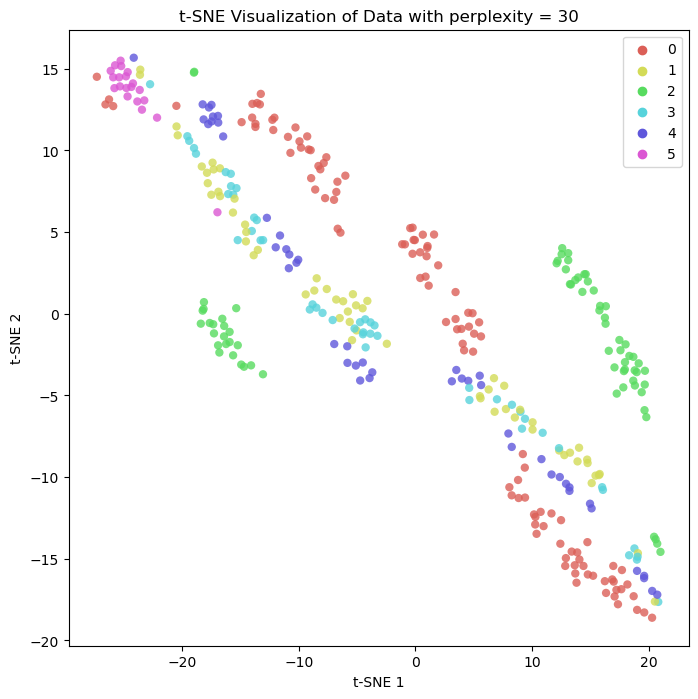

In [28]:
# Create a scatterplot of the t-SNE graph
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=x_tsne[:,0], y=x_tsne[:,1],
    hue=y, palette=sns.color_palette("hls", len(np.unique(y))),
    alpha=0.8, edgecolor='none'
)


plt.title('t-SNE Plot for Dermatology Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of Data with perplexity = 30')
plt.legend(loc='upper right')
plt.show()

In [29]:
# Apply t-SNE with more high perplexity
tsne = TSNE(n_components=2, random_state=110, verbose=2, perplexity = 200)
x_tsne = tsne.fit_transform(x)

[t-SNE] Computing 357 nearest neighbors...
[t-SNE] Indexed 358 samples in 0.001s...
[t-SNE] Computed neighbors for 358 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 358 / 358
[t-SNE] Mean sigma: 11.871308
[t-SNE] Computed conditional probabilities in 0.079s
[t-SNE] Iteration 50: error = 45.7038689, gradient norm = 0.5037895 (50 iterations in 0.140s)
[t-SNE] Iteration 100: error = 47.3393250, gradient norm = 0.4774308 (50 iterations in 0.109s)
[t-SNE] Iteration 150: error = 45.9799194, gradient norm = 0.5185748 (50 iterations in 0.145s)
[t-SNE] Iteration 200: error = 47.5059662, gradient norm = 0.4790353 (50 iterations in 0.119s)
[t-SNE] Iteration 250: error = 46.8133965, gradient norm = 0.4912436 (50 iterations in 0.143s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.813396
[t-SNE] Iteration 300: error = 0.0330425, gradient norm = 0.0029432 (50 iterations in 0.106s)
[t-SNE] Iteration 350: error = 0.0259339, gradient norm = 0.0000887

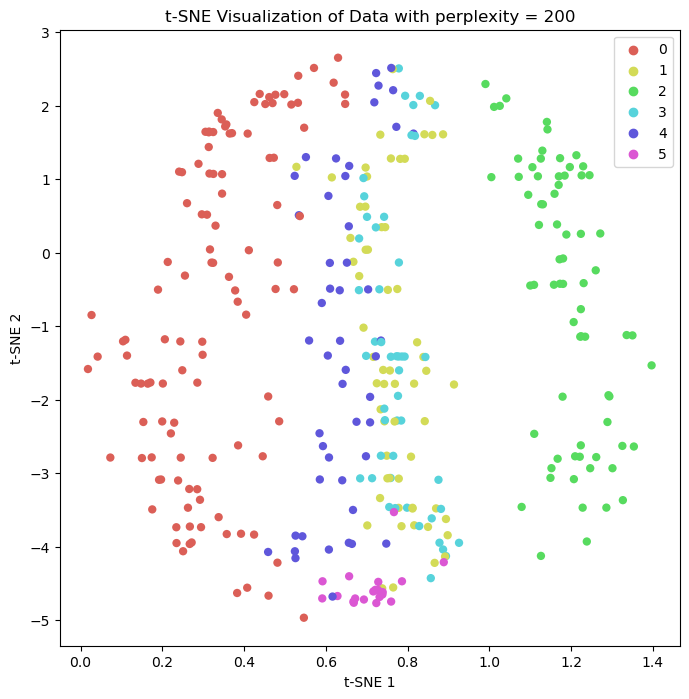

In [30]:
# Create a scatterplot of the t-SNE graph
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=x_tsne[:,0], y=x_tsne[:,1],
    hue=y, palette=sns.color_palette("hls", len(np.unique(y))),
    alpha=1, edgecolor='none'
)


# plt.title('t-SNE Plot for Dermatology Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of Data with perplexity = 200')
plt.legend(loc='upper right')
plt.show()

# Preparing Data for Modelling 🛠️


In [31]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [71]:
x

array([[2, 2, 0, ..., 1, 0, 55],
       [3, 3, 3, ..., 1, 0, 8],
       [2, 1, 2, ..., 2, 3, 26],
       ...,
       [3, 2, 2, ..., 2, 3, 28],
       [2, 1, 3, ..., 2, 3, 50],
       [3, 2, 2, ..., 3, 0, 35]], dtype=object)

In [72]:
y

array([1, 0, 2, 0, 2, 1, 4, 2, 3, 3, 0, 1, 1, 0, 2, 3, 1, 0, 2, 4, 5, 1,
       4, 2, 4, 0, 5, 4, 1, 2, 0, 1, 0, 1, 2, 0, 1, 3, 0, 1, 4, 2, 3, 5,
       1, 2, 2, 3, 0, 0, 4, 0, 1, 2, 3, 1, 5, 0, 4, 0, 1, 2, 0, 3, 4, 0,
       1, 5, 2, 4, 3, 1, 1, 0, 2, 4, 0, 1, 1, 1, 4, 0, 0, 2, 0, 3, 1, 1,
       4, 0, 2, 3, 1, 4, 0, 5, 1, 4, 0, 1, 1, 0, 3, 0, 2, 0, 0, 2, 4, 2,
       2, 4, 1, 2, 3, 0, 1, 4, 5, 0, 0, 1, 5, 2, 4, 3, 0, 0, 2, 4, 4, 0,
       3, 1, 2, 0, 1, 0, 0, 2, 2, 2, 1, 4, 3, 1, 1, 0, 0, 0, 4, 2, 1, 2,
       1, 1, 3, 1, 2, 5, 1, 0, 0, 2, 3, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2,
       0, 0, 0, 0, 5, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 1, 1, 4, 4,
       4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 5, 5, 5, 3, 3, 3,
       0, 0, 0, 0, 0, 1, 1, 3, 3, 3, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 4, 4, 4, 4, 4, 2, 2, 2, 3, 0, 0, 3, 3, 3,

In [32]:
le = LabelEncoder()
y = le.fit_transform(y)


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 110)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(286, 34)
(286,)
(72, 34)
(72,)


# Evaluating all ML Classifiers

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve


In [36]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
y_pred


array([0., 4., 2., 1., 0., 0., 1., 0., 2., 3., 2., 5., 1., 5., 1., 2., 1.,
       2., 3., 0., 3., 0., 1., 0., 1., 3., 2., 1., 4., 0., 1., 3., 2., 0.,
       2., 4., 3., 4., 0., 0., 3., 0., 0., 1., 0., 1., 4., 3., 2., 0., 4.,
       0., 0., 5., 0., 0., 1., 0., 0., 2., 3., 3., 0., 0., 1., 3., 3., 2.,
       3., 2., 3., 4.])

In [37]:
dt_accuracy = round(regressor.score(X_train,y_train)*100,2)
dt_accuracy

100.0

In [38]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [39]:
y_pred = regressor.predict(X_test)
y_pred

array([0.  , 3.82, 1.98, 1.  , 0.  , 0.  , 0.98, 0.  , 2.01, 3.  , 2.  ,
       4.7 , 1.63, 4.99, 1.  , 2.04, 1.  , 2.  , 2.55, 0.  , 1.57, 0.15,
       1.  , 0.  , 1.87, 3.  , 2.  , 1.02, 4.  , 0.  , 2.01, 3.01, 2.05,
       0.  , 2.  , 4.  , 2.98, 4.02, 0.  , 0.  , 2.44, 0.  , 0.  , 1.75,
       0.  , 0.99, 4.  , 2.87, 2.03, 0.1 , 4.  , 0.  , 0.  , 3.04, 0.  ,
       0.  , 1.02, 0.  , 0.  , 2.  , 2.13, 2.98, 0.  , 0.15, 1.24, 2.98,
       1.15, 1.98, 3.  , 2.  , 1.49, 4.08])

In [40]:
rf_accuracy = round(regressor.score(X_train,y_train)*100,2)
rf_accuracy

98.82

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [42]:
y_pred = regressor.predict(X_test)
y_pred

array([-0.19297551,  4.43836346,  1.23908596,  1.2270366 , -0.17091089,
        1.31033976,  1.21666925, -1.31273868,  1.3408365 ,  2.39486785,
        2.08568016,  4.54217088,  2.11546655,  5.30736311,  0.96444904,
        1.42355566,  1.39626935,  2.08017392,  2.14309144, -0.0438046 ,
        1.73182448,  0.41905204,  1.57598068, -0.59473866,  1.87912538,
        2.41489226,  1.84372273,  1.11926937,  3.92969445, -0.09188832,
        1.96240396,  2.5976631 ,  2.12062003,  0.62870216,  1.87548949,
        4.74508288,  2.76091235,  3.79806431,  1.04615718, -0.39350343,
        1.62033649, -0.85471621, -0.29089999,  1.88059103, -0.44407414,
        1.62127022,  4.61352124,  2.30113283,  2.22991683,  0.56263773,
        3.35409849, -0.57681644, -0.16340925,  5.03341475, -0.21714817,
       -1.56815608,  1.95626565,  0.12613521, -1.47187116,  1.80254145,
        2.12563288,  2.5924454 ,  0.41077275,  0.86644407,  1.87993603,
        2.81878334,  1.97782452,  1.54428027,  2.19147128,  2.06

In [43]:
lr_accuracy = round(regressor.score(X_train,y_train)*100,2)
lr_accuracy

89.33

In [44]:
from sklearn.naive_bayes import GaussianNB
regressor = GaussianNB()
regressor.fit(X_train,y_train)

GaussianNB()

In [45]:
y_pred = regressor.predict(X_test)
y_pred

array([0, 4, 2, 3, 0, 0, 1, 0, 2, 3, 2, 5, 3, 5, 3, 2, 1, 2, 3, 0, 4, 0,
       3, 0, 2, 3, 2, 3, 4, 0, 3, 3, 2, 0, 2, 4, 3, 4, 0, 0, 3, 0, 0, 2,
       0, 3, 4, 3, 2, 0, 4, 0, 0, 5, 0, 0, 3, 0, 0, 2, 3, 3, 0, 0, 3, 3,
       1, 2, 3, 2, 2, 4], dtype=int64)

In [46]:
nb_accuracy = round(regressor.score(X_train,y_train)*100,2)
nb_accuracy

90.91

In [47]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train,y_train)

SVR()

In [48]:
y_pred = regressor.predict(X_test)
y_pred

array([ 1.43195551,  2.15170182,  1.69093086,  1.76278216,  0.35910699,
        2.47235788,  1.33925657,  0.28611585,  1.85594086,  1.51717025,
        2.02895428,  2.52760845,  1.5654358 ,  3.7560363 ,  1.3263489 ,
        1.82272985,  2.13882097,  2.11054605,  1.46177052,  0.04315066,
        1.49961179,  2.63198895,  1.51527028,  0.41660934,  2.02850966,
        1.57212339,  1.999524  ,  1.50320526,  1.76736336,  0.07616862,
        1.43397921,  2.9593089 ,  1.83716831,  1.35645369,  2.08216562,
        1.71322476,  2.4235234 ,  2.62378295,  0.35074835,  0.5973311 ,
        1.9580503 ,  0.04259488,  0.78473576,  2.24152345,  0.18159407,
        1.29472437,  1.54834757,  2.35748496,  1.92995766,  1.09317503,
        2.45070513, -0.11533542,  1.32761532,  4.03043251,  0.16676876,
        0.21253085,  2.07951366,  0.08619688, -0.68520758,  1.77409297,
        1.38188494,  2.4214042 ,  1.47694877,  4.00521161,  1.4600913 ,
        2.32731193,  1.32889354,  1.82750387,  1.45908723,  2.08

In [49]:
svm_accuracy = round(regressor.score(X_train,y_train)*100,2)
svm_accuracy

50.76

In [50]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train,y_train)

KNeighborsRegressor()

In [51]:
y_pred = regressor.predict(X_test)
y_pred

array([0. , 2.8, 2. , 1.4, 0. , 3.6, 1.4, 0. , 1.8, 3. , 2. , 1.8, 3.2,
       5. , 1.4, 2. , 1.4, 2. , 2.2, 0. , 2.6, 3. , 1.8, 0.2, 2. , 3. ,
       2. , 1.6, 4. , 0. , 2.2, 2.2, 2. , 0. , 2. , 4. , 2.6, 4. , 0. ,
       1.6, 1.8, 0. , 0.8, 2.2, 0. , 1.4, 3.6, 1.8, 2. , 0. , 3.4, 0. ,
       0. , 5. , 0. , 0. , 1.4, 0. , 0. , 2. , 2.4, 2.2, 0.6, 3.8, 2.2,
       2.2, 2.4, 2. , 1.6, 2. , 1.8, 2.8])

In [52]:
knn_accuracy = round(regressor.score(X_train,y_train)*100,2)
knn_accuracy

88.57

# Cross validation methods


In [53]:
from sklearn.model_selection import cross_val_score


In [54]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.7781286828404124


In [55]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.9143944238195392


In [56]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.8298280416160686


In [57]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.7261052721427853


In [58]:
from sklearn.naive_bayes import GaussianNB
regressor = GaussianNB()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.8743348982785604


# Hyperparameter Tunnings


In [59]:
from sklearn.model_selection import GridSearchCV
parameter = {"max_depth":[2,8,4,7,9,11],
             'criterion':['mse','friedman_mse']}

In [60]:
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)


In [61]:
GCV.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [2, 8, 4, 7, 9, 11]})

In [62]:
GCV.best_params_


{'criterion': 'friedman_mse', 'max_depth': 7}

# Evalute The Final Model


In [66]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)
final_mod = RandomForestRegressor()
final_mod.fit(X_train, y_train)
pred=final_mod.predict(X_test)
print((regressor.score(X_test,y_test)*100))


93.32181379310344


# Saving The Model


In [64]:
import joblib
joblib.dump(final_mod,"FinalModle.pkl")

['FinalModle.pkl']

# Prediction Method
 

In [65]:
import numpy as np

final_mod = RandomForestRegressor()
final_mod.fit(X_train, y_train)
pred=final_mod.predict(X_test)
preds=regressor.predict(X_test)
print(preds[:36])
print(y_test[:36])
 

[0.   3.83 2.02 1.   0.   0.   1.06 0.   2.06 3.   2.   4.73 1.47 5.
 1.   2.03 1.   2.   2.29 0.   1.7  0.1  1.02 0.   1.85 3.   2.   0.99
 4.   0.   1.91 2.97 2.01 0.   2.   4.  ]
[0 4 2 1 0 0 1 0 2 3 2 5 1 5 1 2 1 2 3 0 1 0 1 0 2 3 2 1 4 0 1 3 2 0 2 4]


The train and test data is balanced most regressor methods hit the 93.32% accuracy with the datset.
